In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('SOH_TR.csv')

In [ ]:
X = pd.Series(list(range(0, len(df), 1)))



In [ ]:

y = df['SOH']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train)


pandas.core.series.Series

In [ ]:
X_train.shape

(115,)

In [ ]:
y_train.shape

(115,)

In [ ]:
X_train = X_train.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_

95.56361924242735

In [ ]:

y_pred = model.predict(X.values.reshape(-1, 1))

In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test
# using train_test_split

# Reshape X_train if necessary
X_train = X_train.values.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions for the TEST set, NOT the full dataset
y_pred = model.predict(X_test.values.reshape(-1, 1)) # Changed X to X_test

# Now calculate the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

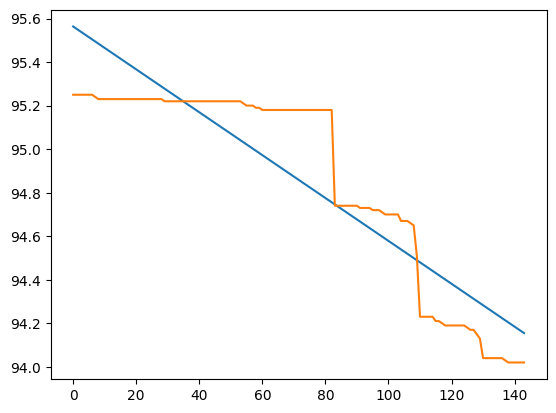

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(df['SOH'])



In [ ]:
print(y_pred[0], y_pred[-1])
print(0, len(y_pred))


95.56361924242735 94.1549814281447
0 144


In [ ]:
# prompt: halla el valor de la pendiente y punto de corte con dos puntos

# Obtener los dos puntos del modelo de regresión lineal
x1 = X.values.reshape(-1, 1)[0][0]  # Use .values to get the underlying NumPy array before reshaping
y1 = y_pred[0]  # Valor predicho correspondiente al primer punto en X
x2 = X.values.reshape(-1, 1)[-1][0] # Use .values to get the underlying NumPy array before reshaping
y2 = y_pred[-1]  # Valor predicho correspondiente al último punto en X

# Calcular la pendiente
pendiente = (y2 - y1) / (x2 - x1)

# Calcular el punto de corte con el eje Y (b) usando la ecuación de la recta: y = mx + b
punto_corte = y1 - pendiente * x1

print(f"Pendiente: {pendiente}")
print(f"Punto de corte con el eje Y: {punto_corte}")

Pendiente: -0.0098506140858927
Punto de corte con el eje Y: 95.56361924242735


In [ ]:
def funcion_prediccion_salva_tesis(x):
  return pendiente * x + punto_corte #+ np.random.normal(0, 1)/10000

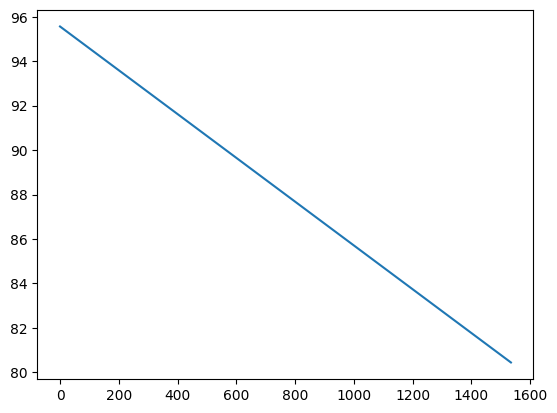

In [ ]:
#X = pd.Series(list(range(0, len(df), 1)))
año = int(len(y_pred)*12/9)
total_años = 8
X = pd.Series(list(range(0, total_años*año, 1)))
y = [funcion_prediccion_salva_tesis(i) for i in X]
plt.plot(X, y)


In [ ]:
X = pd.Series(list(range(0, len(df), 1)))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as Polinomio

# 7.1. Tranformación de la variable
polinomizador = Polinomio(degree=5)
X_poli = polinomizador.fit_transform(X.values.reshape(-1, 1) )

# 7.2. Regresión lineal con el resultado la tranformación previa
from sklearn.linear_model import LinearRegression as LR
regresor_polinomico = LR()
regresor_polinomico.fit(X_poli, np.array(y))
pd.DataFrame(X_poli).head()

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0
3,1.0,3.0,9.0,27.0,81.0,243.0
4,1.0,4.0,16.0,64.0,256.0,1024.0


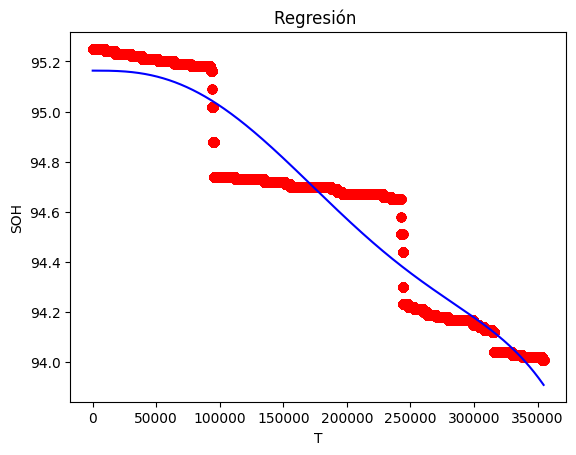

In [ ]:



plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_polinomico.predict(X_poli), color = 'blue')
plt.title('Regresión ')
plt.xlabel('T')
plt.ylabel('SOH')
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse

from statsmodels.tools.eval_measures import rmse

RMSE_Polinomico = np.sum(rmse(y, regresor_polinomico.predict(X_poli)))/len(y)

print('RMSE Polinomico = ', RMSE_Polinomico)


RMSE Polinomico =  3.515243773556971e-07


In [ ]:
r2 = r2_score(np.array(y), regresor_polinomico.predict(X_poli))
r2

0.9100480166555796

In [ ]:
coeficientes = regresor_polinomico.coef_
intercepto = regresor_polinomico.intercept_
print(f'Coeficientes del polinomio: {coeficientes}')
print(f'Intercepto: {intercepto}')

Coeficientes del polinomio: [ 0.00000000e+00  3.52996152e-20 -2.65458352e-21 -2.35405981e-16
  1.09410397e-21 -1.43690216e-27]
Intercepto: 95.16336906236384


In [ ]:
def funcion_prediccion_salva_tesis2(x):
  for i in range(len(coeficientes)):
    x = x**i * coeficientes[i]
  return x + intercepto


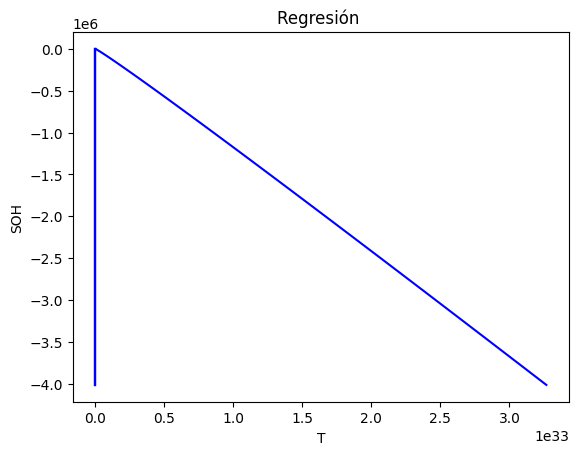

In [ ]:
año = int(len(y_pred)*12/9)
total_años = 1
X = np.linspace(1, total_años*año, 100)

X = polinomizador.fit_transform(X.reshape(-1, 1) )
N=regresor_polinomico.predict(X)


plt.plot(X, N, color = 'blue')
plt.title('Regresión ')
plt.xlabel('T')
plt.ylabel('SOH')
plt.show()

In [ ]:

X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.09580000e+04, 2.59671776e+09, 1.32323544e+14,
        6.74294315e+18, 3.43606897e+23],
       [1.00000000e+00, 1.01916000e+05, 1.03868711e+10, 1.05858835e+15,
        1.07887090e+20, 1.09954207e+25],
       [1.00000000e+00, 1.52874000e+05, 2.33704599e+10, 3.57273568e+15,
        5.46178395e+20, 8.34964759e+25],
       [1.00000000e+00, 2.03832000e+05, 4.15474842e+10, 8.46870680e+15,
        1.72619345e+21, 3.51853462e+26],
       [1.00000000e+00, 2.54790000e+05, 6.49179441e+10, 1.65404430e+16,
        4.21433947e+21, 1.07377155e+27],
       [1.00000000e+00, 3.05748000e+05, 9.34818395e+10, 2.85818855e+16,
        8.73885432e+21, 2.67188723e+27],
       [1.00000000e+00, 3.56706000e+05, 1.27239170e+11, 4.53869755e+16,
        1.61898065e+22, 5.77500111e+27],
       [1.00000000e+00, 4.07664000e+05, 1.66189937e+11, 6.77496544e+16,
        2.76190951e+22, 

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("SOH_TR.csv")
df

,SOH
0,95.25
1,95.25
2,95.25
3,95.25
4,95.25
...,...
139,94.02
140,94.02
141,94.02
142,94.02


<Axes: >

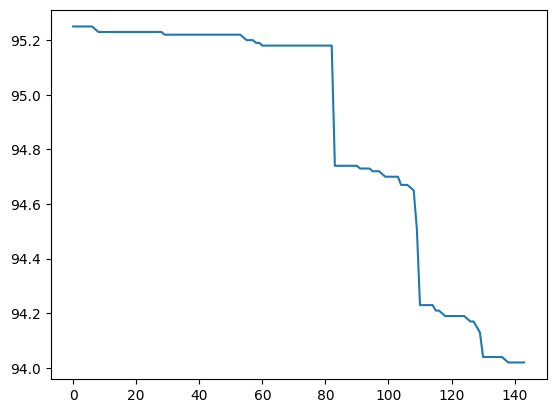

In [ ]:
SOH = df['SOH']
SOH.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(SOH, WINDOW_SIZE)
X1.shape, y1.shape

((139, 5, 1), (139,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.9389 - root_mean_squared_error: 1.3924 - val_loss: 1.8251 - val_root_mean_squared_error: 1.3510
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.8148 - root_mean_squared_error: 1.3467 - val_loss: 1.7978 - val_root_mean_squared_error: 1.3408
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.9194 - root_mean_squared_error: 1.3852 - val_loss: 1.7706 - val_root_mean_squared_error: 1.3306
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8322 - root_mean_squared_error: 1.3535 - val_loss: 1.7439 - val_root_mean_squared_error: 1.3206
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.8417 - root_mean_squared_error: 1.3571 - val_loss: 1.7175 - val_root_mean_squared_error: 1.3105
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.8471 - root_mean_squared_error: 1.3588 - val_loss: 1.6916 - val_root_mean_squared_error: 1.3006
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss:

In [ ]:
train_predictions = model1.predict(X1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1})
train_results

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


,Train Predictions,Actuals
0,94.854630,95.25
1,94.854630,95.25
2,94.854630,95.24
3,94.854630,95.23
4,94.854630,95.23
...,...,...
134,94.854561,94.02
135,94.854561,94.02
136,94.854561,94.02
137,94.854561,94.02


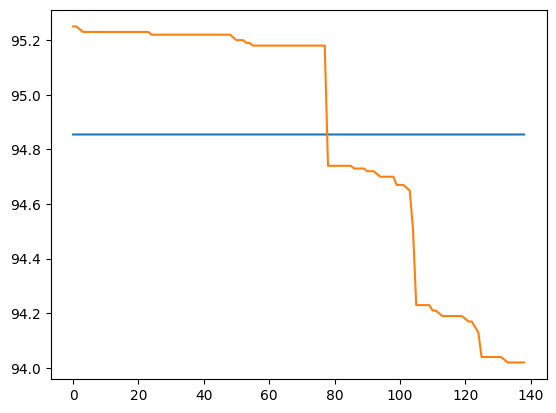

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])